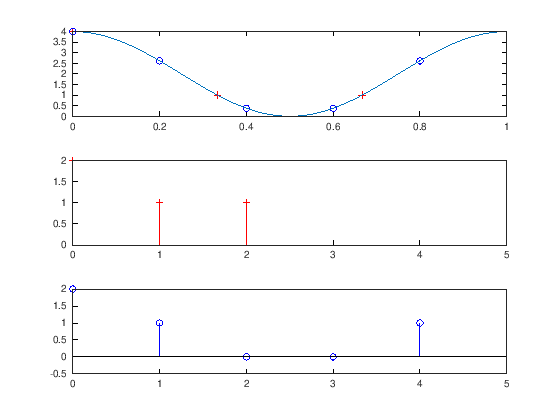

In [1]:
clear all; close all;
TE= @(f) 2+2*cos(2*pi*f);

subplot(3,1,1)
Fe=1;
n3=0:2; Df3=Fe/3; f3=n3*Df3;
n5=0:4; Df5=Fe/5; f5=n5*Df5;
plot(f3,TE(f3),'r+'); hold on;
plot(f5,TE(f5),'bo'); hold on;
f=0:0.01:1;
plot(f,TE(f));

subplot(3,1,2)

stem(0:2,(ifft(TE(f3))),'r+');
axis([0,5])
subplot(3,1,3)
stem(0:4,(ifft(TE(f5))),'bo');
axis([0,5])


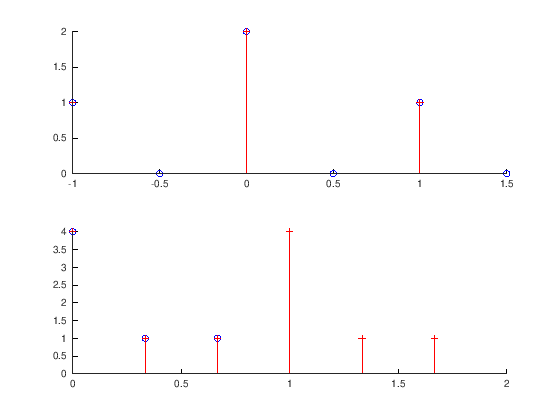

In [2]:
delta = @(k) k==0 ; % impulsion unité discrète (astuce vaut 1 quand vrai)
func_e = @(k) delta(k-1) + 2*delta(k) + delta(k+1) ;

Fe=1; Te=1/Fe; k=-1:1; N=3;n=0:2; Df=Fe/N;
e=func_e(k);
Feprime=2*Fe; Teprime=1/Feprime;
kprime=-(N-1):N; tprime=kprime*Teprime;
y=func_e(tprime);
subplot(211)
stem(kprime*Te/2,y,'bo');hold on;
stem(k*Te,e,'r+');

Nprime=2*N;
nprime=(1:Nprime)-1; Dfprime=2*Fe/Nprime;
subplot(212)
stem(n*Df,abs(fft(e)),'bo'); hold on;
stem(nprime*Dfprime,abs(fft(y)),'r+');


Conclusion :

interpoler plus finement les fréquences <-> Rallonge la période du temporel en ajoutant des zeros en fin de période. zero padding temporel
Elever l'échantillonage temporel en insérant des zéros entre échantillons <-> Ne change pas le spectre (Fe périodique puis 2Fe periodique = pareil)
On ne rajoute pas d'information au signal. Mais le fréquentiel est plus lisible et plus lissé à voir...

Qu'en serait-il du dual de ces opérations ?

interpoler plus finement le temporel <-> ???
Elever l'échantillonnage fréquentiel en insérant des zeros entre échantillons <-> ???


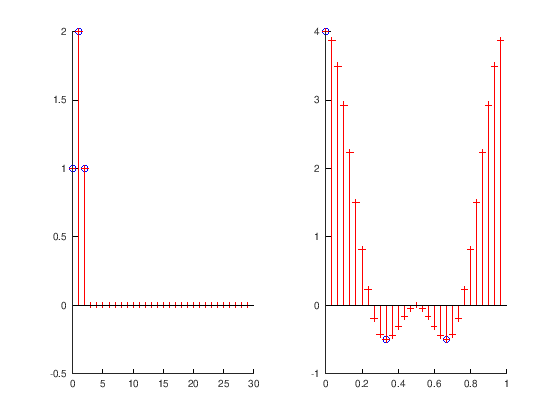

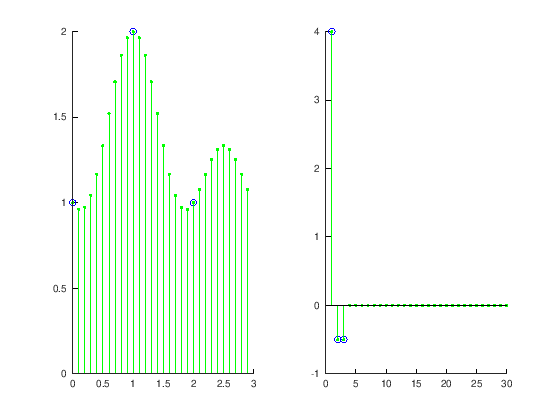

In [4]:
clear all;
s=[1,2,1];
N=30;
Sinterp=fft(s,N); %zero pading du temps (ajoute 27 zeros)
spad=ifft(Sinterp);
subplot(121)
stem(0:2,s,'bo');hold on;
stem(0:(N-1),spad,'r+')
subplot(122)
stem((0:2)/3,fft(s),'bo');hold on;
stem((0:(N-1))/N,fft(s,N),'r+')

figure;
sinterp = ifft(fft(s),N)*10; % normalisation 10 fois plus de points
subplot(121)
stem(0:2,s,'bo');hold on;
stem((0:(N-1))/10,sinterp,'g.') % zero padding des fréquences
subplot(122)
stem(fft(s),'bo'); hold on;
stem(fft(sinterp)/10,'g.')